1. Hurricanes per Year

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?

Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.
Hint: compute the probability that in a single year are observed 15 or more hurricances.

In [2]:
from scipy import stats
import math


P = 1 - stats.poisson.cdf(14, 6.3)
print(f"Probability of 15 or more hurricances: {P}")


zscore = (15 - 6.3 ) / math.sqrt(6.3) 
print(f"Z score: {zscore}")

#Zscore is more than 3 so there is a significant difference between the number of hurricanes in 2005 and the historic average.


Probability of 15 or more hurricances: 0.002217122790073134
Z score: 3.4661629670697414


2. Pairwise t-test

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
Determine whether the change in blood pressures within our sample was statistically significant.

In [3]:
import numpy as np


pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
mean_diff = np.mean(post) - np.mean(pre)
std_diff = np.sqrt(((n-1)*np.var(pre, ddof=1) + (n-1)*np.var(post, ddof=1)) / (2*n - 2))
t_statistic = mean_diff / (std_diff * np.sqrt(2/n))
freedom_degree = 2*n - 2
pvalue = stats.t.cdf(t_statistic, n - 1) + (1.0 - stats.t.cdf(-t_statistic, n - 1))

print(f"t-statistic is: {t_statistic}")
print(f"p-value is: {pvalue}")

#Blood pressures change within our sample isn't statistically significant

t-statistic is: 3.786997938137629
p-value is: 1.9956975358671354


3. Curve fitting of temperature in Alaska

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max: 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

Plot these temperatures.
Find a suitable a function that can describe min and max temperatures.
Fit this function to the data with scipy.optimize.curve_fit().
Plot the result. Is the fit reasonable? If not, why?
Is the time offset for min and max temperatures the same within the fit accuracy?

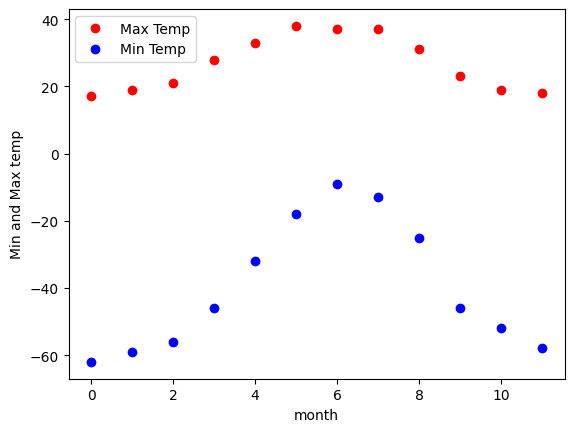

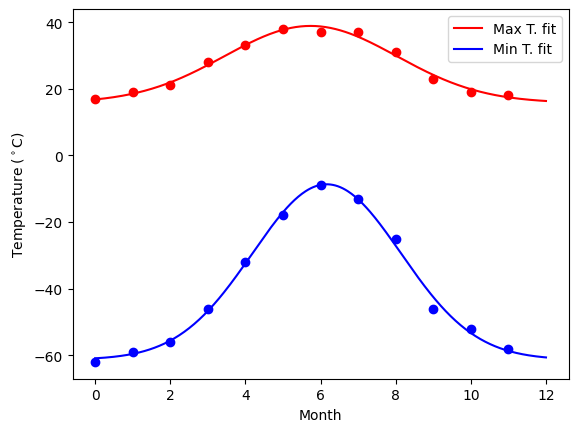

In [4]:
import matplotlib.pyplot as plt
from scipy import optimize


max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]) 
min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]) 
month = np.arange(12) 

plt.plot(month, max, 'ro', label="Max Temp")
plt.plot(month, min, 'bo', label="Min Temp")
plt.xlabel('month')
plt.ylabel('Min and Max temp')
plt.legend()


def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o
    
res_max, cov_max = optimize.curve_fit(gauss, month, max)
res_min, cov_min = optimize.curve_fit(gauss, month, min,[50, 6, 1, -60])
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(month, max, 'ro')
plt.plot(days, gauss(days, *res_max), 'r-', label="Max T. fit")
plt.plot(month, min, 'bo')
plt.plot(days, gauss(days, *res_min), 'b-', label="Min T. fit")
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()



4. Fit the residues

Read the data/residuals_261.pkl file. If you haven't got it already, download it from here:

wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
The feature named residual contains the residuals (defined as 
) of a linear regression as a function of the independent variable distances.

Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
Set the appropriate Poisson uncertainty for each bin (thus, for each bin, 
, where 
 is the number of entries in each bin)
By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

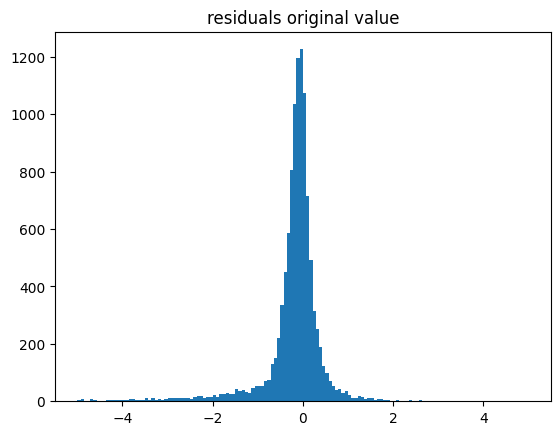

Sigma values: [ 2.23606798  2.82842712  1.41421356  1.41421356  3.          1.73205081
  1.41421356  1.41421356  1.41421356  2.23606798  2.23606798  2.44948974
  2.44948974  2.          2.          2.          2.82842712  3.
  2.44948974  2.44948974  2.23606798  3.16227766  2.23606798  3.16227766
  2.23606798  2.82842712  2.          2.82842712  3.31662479  3.16227766
  3.16227766  3.46410162  3.60555128  3.31662479  3.31662479  2.82842712
  4.          4.12310563  4.35889894  3.60555128  4.          3.87298335
  4.69041576  3.87298335  4.89897949  5.19615242  5.47722558  5.09901951
  5.          6.55743852  5.91607978  6.164414    5.65685425  5.47722558
  6.70820393  7.28010989  7.21110255  7.21110255  8.42614977  8.66025404
 11.35781669 12.20655562 14.79864859 18.33030278 21.26029163 24.18677324
 28.35489376 32.20248438 34.55430509 35.0142828  32.74141109 26.75817632
 22.18107301 17.74823935 15.8113883  13.74772708 11.04536102  9.94987437
  8.36660027  7.21110255  6.32455532  6.48074

TypeError: 'numpy.ndarray' object is not callable

In [5]:
import pandas as pd
import math
import statistics
from scipy.optimize import curve_fit

data = np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data) 


n,bins,_ = plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.title("residuals original value")
plt.show()

x = (bins[:-1] + bins[1:])*0.5


sigma_values = np.sqrt(np.abs(n))
print(f"Sigma values: {sigma_values}")


def gauss(x,ampl, mu, sigma, o):
    return ampl*np.exp(-(x-mu)**2/(2*sigma**2)) + o

mu = statistics.mean(df["residuals"])
sigma = statistics.stdev(df["residuals"])

popt,pcov = optimize.curve_fit(gauss,x , n, [max(df["residuals"]),mu,sigma,0])

plt.hist(df["residuals"], bins = 140, range = (-5,5))
plt.plot(x, gauss(x, *popt), color ="red")
plt.title("Fit of residuals")
plt.show()


ndof = len(x) - 1
func_fit = gauss(x, *popt)

chi2 = np.sum(((n - func_fit)**2) / sigma**2)
print("chi2 =", chi2)

pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue)

if(pvalue< 0.05):
    print("The fit is considered unsatisfactor")
else:
    print("The fit is considered satisfactor")

5

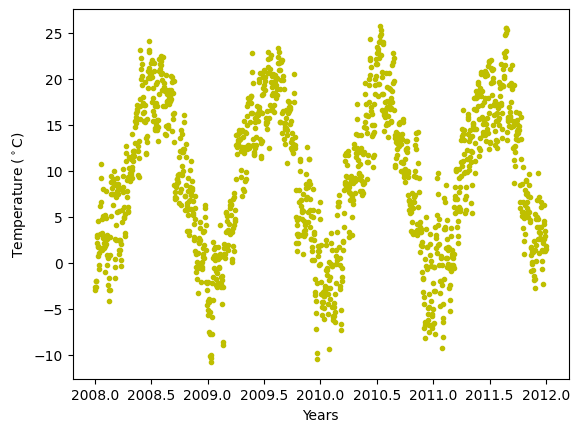

Theoric fit values (f function): a: 36.5, b: 6, c: 9.261252084167237
Best fit values (f function): a: -9.96203467845643, b: 6.048557550597423, c: 9.262821312109583


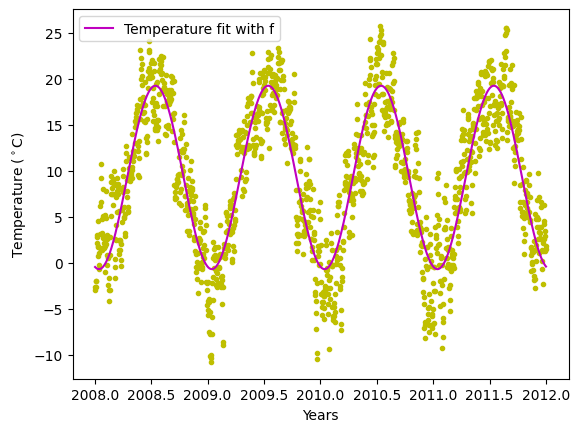

Average temperature in Munich: 9.261252084167237°C
Average temperature in hottest days: 24.907408333333336
Average temperature in coldest days: -9.777784

Best fit values (g function): a: -9.960730289233492, b: 1.000293534325886, c: 8.62453097035047, d: 9.265675288369197


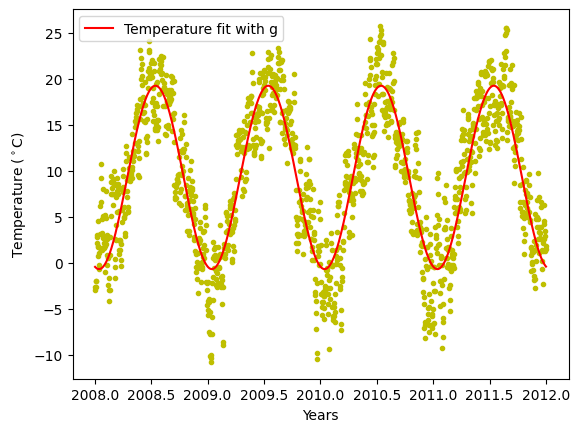

RSS of f(x): 18669.515394578364
RSS of g(x): 18669.225430813814
p-value: 0.881 , additional parameter necessary: NO


In [7]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

import matplotlib.pyplot as plt
from scipy import optimize


data = np.loadtxt('data/munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data) 
df.columns = ["years", "temperatures"] 

range_df = df[(df["years"] > 2008) & (df["years"] < 2012)].reset_index()
range_df = range_df.drop(range_df[range_df["temperatures"] > 90.].index).reset_index()

year = range_df["years"].copy()
temp = range_df["temperatures"].copy()

temp_np = temp.to_numpy()
months_np = year.to_numpy()



plt.plot(months_np, temp_np, 'y.')
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.show()

def f(t, a, b, c):
    return a * np.cos( 2 * np.pi * t + b) + c

a = range_df["temperatures"].max() - range_df["temperatures"].min() 
b = 6
c = range_df["temperatures"].mean() 
print(f"Theoric fit values (f function): a: {a}, b: {b}, c: {c}")

res_max_f, cov_max = optimize.curve_fit(f, months_np, temp_np, [a,b,c])
print(f"Best fit values (f function): a: {res_max_f[0]}, b: {res_max_f[1]}, c: {res_max_f[2]}")

plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, f(months_np, *res_max_f), 'm-', label="Temperature fit with f")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()

print(f"Average temperature in Munich: {c}\u00b0C")

hot_days = range_df.nlargest(12, "temperatures") 
mean_hot_days = np.mean(hot_days["temperatures"].to_numpy())
print(f"Average temperature in hottest days: {mean_hot_days}")

cold_days = range_df.nsmallest(10, "temperatures") 
mean_cold_days = np.mean(cold_days["temperatures"].to_numpy())
print(f"Average temperature in coldest days: {mean_cold_days}\n")


def g(t, a, b, c, d):
    return a * np.cos( 2 * np.pi * t * b + c) + d

res_max_g, cov_max = optimize.curve_fit(g, months_np, temp_np)
print(f"Best fit values (g function): a: {res_max_g[0]}, b: {res_max_g[1]}, c: {res_max_g[2]}, d: {res_max_g[3]}")

plt.figure()
plt.plot(months_np, temp_np, 'y.')
plt.plot(months_np, g(months_np, *res_max_g), 'r-', label="Temperature fit with g")
plt.xlabel('Years')
plt.ylabel('Temperature ($^\circ$C)')
plt.legend()
plt.show()


residuals_f = temp_np - f(months_np, *res_max_f)
rss_f = np.sum(residuals_f**2)
print(f"RSS of f(x): {rss_f}")

residuals_g = temp_np - g(months_np, *res_max_g)
rss_g = np.sum(residuals_g**2)
print(f"RSS of g(x): {rss_g}")


def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < 0.05 else "NO")
    return pval

fisher_test = Ftest(rss_f, rss_g, 3,4,len(months_np), True)